### Post modeling EDA

In [ ]:
#Import relevant packages
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Read the saved 'estimated' file which is a dataframe containing predicted movie ratings
est = pd.read_csv('estimated')
est.head(2)

,Unnamed: 0,userId,movieId,estimatedrating
0,0,1,1,4.546813
1,1,1,3,3.762028


In [5]:
est.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
est.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228361 entries, 0 to 228360
Data columns (total 3 columns):
userId             228361 non-null int64
movieId            228361 non-null int64
estimatedrating    228361 non-null float64
dtypes: float64(1), int64(2)
memory usage: 5.2 MB


In [63]:
est.isna().sum()

userId             0
movieId            0
estimatedrating    0
dtype: int64

In [60]:
est.nunique()

userId                133
movieId              1717
estimatedrating    228116
dtype: int64

In [8]:
act = pd.read_csv('cleaneddata')
act.head(2)

,Unnamed: 0,userId,movieId,rating,title,genres,year
0,0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,1,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance,1995


In [9]:
act.drop(['Unnamed: 0'], axis=1, inplace=True)

In [10]:
act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100819 entries, 0 to 100818
Data columns (total 6 columns):
userId     100819 non-null int64
movieId    100819 non-null int64
rating     100819 non-null float64
title      100819 non-null object
genres     100819 non-null object
year       100819 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 4.6+ MB


In [62]:
act.isna().sum()

userId     0
movieId    0
rating     0
title      0
genres     0
year       0
dtype: int64

In [61]:
act.nunique()

userId      610
movieId    9712
rating       10
title      9707
genres      951
year        107
dtype: int64

First want to look at EDA differences between the actual user ratings vs the model predicted ratings.

In [45]:
df_inner = act.merge(est, how='inner')

In [67]:
df_inner

,userId,movieId,rating,title,genres,year,estimatedrating
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,4.546813
1,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance,1995,3.762028
2,1,6,4.0,Heat (1995),Action|Crime|Thriller,1995,4.449869
3,1,47,5.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1995,4.872889
4,1,50,5.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1995,4.916431
...,...,...,...,...,...,...,...
47227,610,152081,4.0,Zootopia (2016),Action|Adventure|Animation|Children|Comedy,2016,3.854231
47228,610,158238,5.0,The Nice Guys (2016),Crime|Mystery|Thriller,2016,4.215047
47229,610,164179,5.0,Arrival (2016),Sci-Fi,2016,4.311976
47230,610,166528,4.0,Rogue One: A Star Wars Story (2016),Action|Adventure|Fantasy|Sci-Fi,2016,4.129635


In [22]:
df_inner.groupby('title').mean()['estimatedrating'].sort_values(ascending=False)

title
Paths of Glory (1957)                         4.580851
Double Indemnity (1944)                       4.494700
Streetcar Named Desire, A (1951)              4.464226
Godfather, The (1972)                         4.435731
Shawshank Redemption, The (1994)              4.428749
                                                ...   
Problem Child (1990)                          1.883254
Scary Movie 3 (2003)                          1.827069
Flintstones in Viva Rock Vegas, The (2000)    1.816217
Superman IV: The Quest for Peace (1987)       1.794489
Speed 2: Cruise Control (1997)                1.716490
Name: estimatedrating, Length: 1717, dtype: float64

/Users/MZhang/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


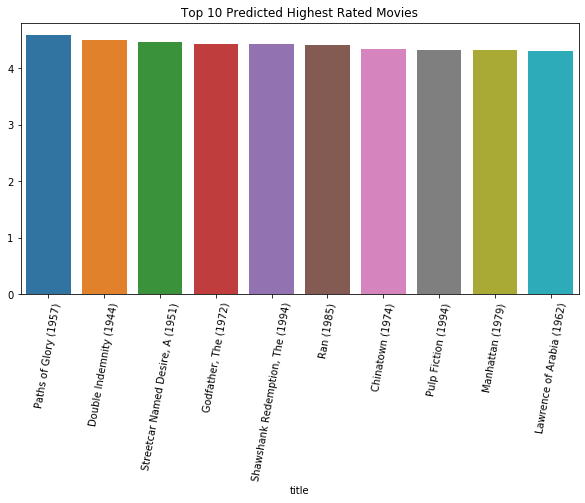

In [53]:
#Plot the top 10 predicted highest rated movies
plt.figure(figsize=(10,5))
topmovies = df_inner.groupby('title').mean()['estimatedrating'].sort_values(ascending=False).head(10)
sns.barplot(topmovies.index, topmovies.values)
plt.title('Top 10 Predicted Highest Rated Movies')
plt.xticks(rotation=80);

In terms of unpersonalized recommendations, we can suggest the top 10 highest rated movies based on model predictions

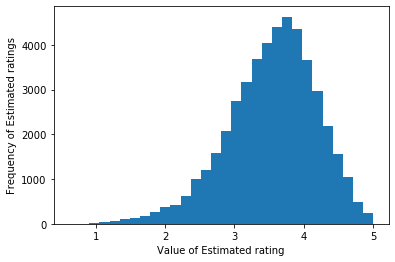

In [64]:
#Plot a histogram of the frequency of certain estimated rating values
plt.hist(df_inner['estimatedrating'],bins=30)
plt.xlabel('Value of Estimated rating')
plt.ylabel('Frequency of Estimated ratings')
plt.show()

Similar to the actual ratings, in that the peak frequency was about 4 as well and less values at the lower end
(1, 2) etc.

In [24]:
df_inner.groupby('title').size().sort_values(ascending=False)

title
Forrest Gump (1994)                                                   119
Matrix, The (1999)                                                    113
Star Wars: Episode IV - A New Hope (1977)                             111
Star Wars: Episode V - The Empire Strikes Back (1980)                 107
Pulp Fiction (1994)                                                   105
                                                                     ... 
Around the World in 80 Days (1956)                                     11
Englishman Who Went Up a Hill But Came Down a Mountain, The (1995)     11
Enter the Dragon (1973)                                                11
Purple Rose of Cairo, The (1985)                                       11
Fantastic Beasts and Where to Find Them (2016)                         11
Length: 1717, dtype: int64

/Users/MZhang/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


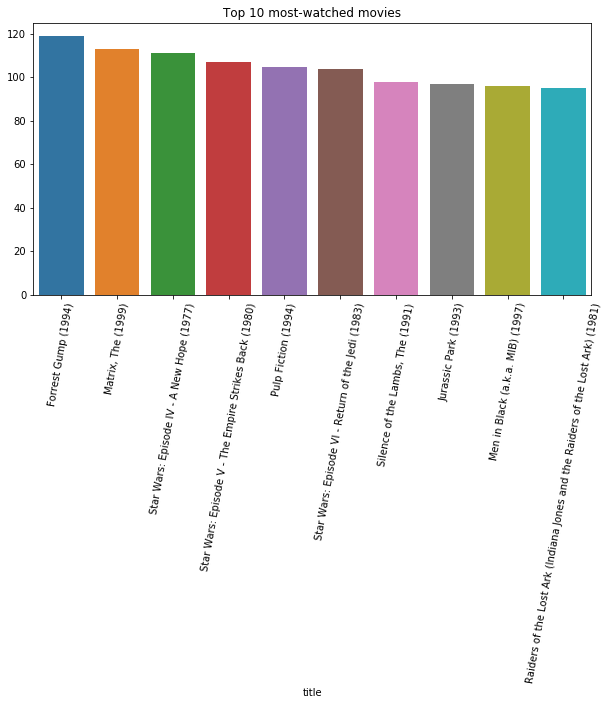

In [52]:
#Plot the top 10 most watched movies
plt.figure(figsize=(10,5))
topmovies = df_inner.groupby('title').size().sort_values(ascending=False).head(10)
sns.barplot(topmovies.index, topmovies.values)
plt.title('Top 10 most-watched movies')
plt.xticks(rotation=80);

In [57]:
df_left = act.merge(est, how='outer')

In [58]:
df_left.isna().sum()

userId                  0
movieId                 0
rating             181129
title              181129
genres             181129
year               181129
estimatedrating     53587
dtype: int64

In [59]:
df_left.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281948 entries, 0 to 281947
Data columns (total 7 columns):
userId             281948 non-null int64
movieId            281948 non-null int64
rating             100819 non-null float64
title              100819 non-null object
genres             100819 non-null object
year               100819 non-null object
estimatedrating    228361 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 17.2+ MB
